In [1]:
from PIL import Image
im = Image.open('./data/result/output-opt.png')
im.save('out_300.tiff', dpi=(300, 300))
imr = Image.open('./out_300.tiff')
imr.info

{'compression': 'raw', 'dpi': (300.0, 300.0)}

True

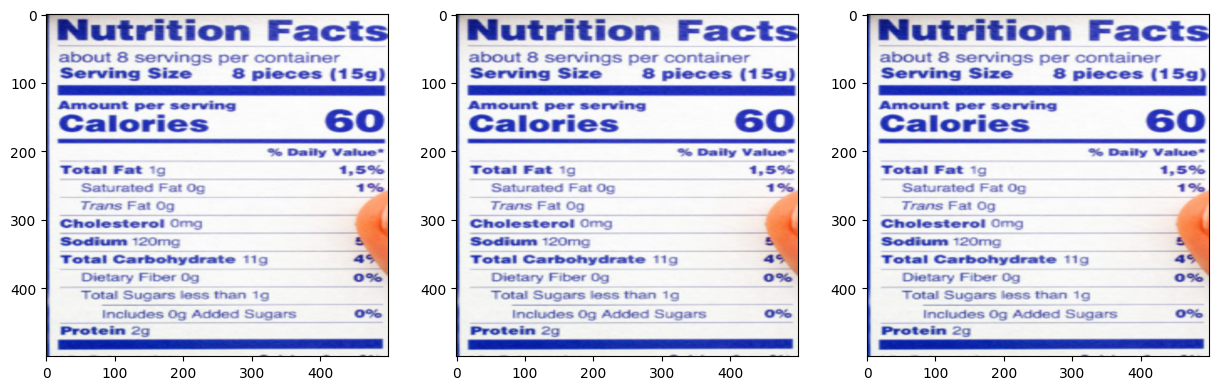

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./out_300.tiff')
imgr_cub = cv2.resize(img, (500, 500), cv2.INTER_CUBIC)
imgr_linear = cv2.resize(img, (500, 500), cv2.INTER_LINEAR)
imgr_nearest = cv2.resize(img, (500, 500), cv2.INTER_NEAREST)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(imgr_cub, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(imgr_linear, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(imgr_nearest, cv2.COLOR_BGR2RGB))
cv2.imwrite('./result.png', imgr_cub)

In [ ]:
%load_ext autoreload
%autoreload 2
from convert_dpi import Image_dpi
import matplotlib.pyplot as plt

img = Image_dpi('./data/result/output-opt.png')
plt.imshow(img)


In [2]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('../Nutrition-Fact-Detector/data/result/output.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (e.g., using Canny)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Use HoughLines to detect lines in the image
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=100)

# Draw the lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2.imshow('Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


: 